In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import modin.pandas as mpd

2025-09-24 11:39:28.477491: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())
print(tf.config.list_physical_devices("GPU"))


OrderedDict([('cpu_compiler', 'clang 18'), ('cuda_compute_capabilities', ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90']), ('cuda_version', '12.5.1'), ('cudnn_version', '9'), ('is_cuda_build', True), ('is_rocm_build', False), ('is_tensorrt_build', False)])
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
# mnist = tf.keras.datasets.fashion_mnist
 
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0
 
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])
# model.compile(optimizer = tf.optimizers.Adam(),
#                               loss = "sparse_categorical_crossentropy",
#                               metrics = ["accuracy"])
# model.fit(x_train, y_train, epochs = 10)

In [3]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [4]:
# Cek daftar GPU yang terdeteksi
print("GPUs detected:", tf.config.list_physical_devices('GPU'))

# Cek apakah TensorFlow bisa pakai GPU
print("Built with GPU support:", tf.test.is_built_with_cuda())
print("GPU available:", tf.test.is_gpu_available())

GPUs detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Built with GPU support: True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available: True


I0000 00:00:1758688788.816966    3980 gpu_device.cc:2020] Created device /device:GPU:0 with 2286 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:02:00.0, compute capability: 8.6


In [11]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18366854495431110057
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2397175808
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15353060375242009290
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:02:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


I0000 00:00:1758676728.361734    3535 gpu_device.cc:2020] Created device /device:GPU:0 with 2286 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:02:00.0, compute capability: 8.6


# Pra-pemrosesan Data untuk Model

## Data Augmentasi dengan TensorFlow <= 2.9

In [12]:
# ini untuk versi lama, versi baru sudah menggunakan pre prorses langsud di model nya

from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

## Data Augmentasi dengan TensorFlow > 2.9

In [13]:
from tensorflow.keras import layers

IMG_SIZE = 180
 
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [14]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [15]:
model = tf.keras.Sequential([
  # Menambahkan processing image yang telah didefinisikan sebelumnya
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # Sesuaikan sisa layer dengan kasus yang Anda miliki
])

Pada tahap terakhir, Anda perlu memasukkan data augmentasi tersebut pada layer sequentials ketika membangun struktur neural network agar seluruh dataset yang ada dapat diproses dan melakukan pelatihan dengan baik. Berikut contoh kode yang dapat Anda lakukan untuk menerapkan data augmentasi.

## Pemrosesan Data Bahasa

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ["I love my cat"]
 
tokenizer = Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
 
print(tokenizer.word_index)
print(sequences)

{'i': 1, 'love': 2, 'my': 3, 'cat': 4}
[[1, 2, 3, 4]]


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["I love my cat",
             "Do you think my cat is cute?"]
 
 
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
sentences = ["I love my cat",
             "Do you think my cat is cute?",
             "Additional cat for you"]
sequences = tokenizer.texts_to_sequences(sentences)
 
padded = pad_sequences(sequences, padding="post", truncating="post", maxlen=10)
 
print("Tokenizer: ",tokenizer.word_index)
print("Sequences: ",sequences)
print("Padded: ",padded)

Tokenizer:  {'<OOV>': 1, 'my': 2, 'cat': 3, 'i': 4, 'love': 5, 'do': 6, 'you': 7, 'think': 8, 'is': 9, 'cute': 10}
Sequences:  [[4, 5, 2, 3], [6, 7, 8, 2, 3, 9, 10], [1, 3, 1, 7]]
Padded:  [[ 4  5  2  3  0  0  0  0  0  0]
 [ 6  7  8  2  3  9 10  0  0  0]
 [ 1  3  1  7  0  0  0  0  0  0]]


# Menggunakan Model untuk Melakukan Prediksi

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

2025-09-24 08:35:39.701451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X = np.array([-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=float)
Y = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0], dtype=float)

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
    ])

/home/ayam/miniconda3/envs/tf220/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758677764.264311   11051 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2286 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:02:00.0, compute capability: 8.6


In [5]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [6]:
model.fit(X, Y, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - loss: 152.7816
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 125.6819
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 106.2539
Epoch 4/500


2025-09-24 08:37:06.107773: I external/local_xla/xla/service/service.cc:163] XLA service 0x788a04005220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-24 08:37:06.107787: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-09-24 08:37:06.123253: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300
I0000 00:00:1758677826.189130   11433 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 92.1326
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 81.6903
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 73.8065
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 67.7092
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 62.8664
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 58.9115
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 55.5911
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 52.7301
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 50.2072
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 47.9380
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 45.8639
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 43.9436
Epoch 16/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 42.1480
Epoch 17/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 40.4562
Epoch 18/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 38.8535
Epoch 19/500


In [8]:
model.predict(np.array([4, 5])).round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[13.],
       [14.]], dtype=float32)

# Model Sekuensial dengan Beberapa Layer

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, input_shape=[1]),
    tf.keras.layers.Dense(units=15),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
    ])

/home/ayam/miniconda3/envs/tf220/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X, Y, epochs=500)

Epoch 1/500


2025-09-24 08:41:22.455087: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step - loss: 104.2049
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 68.2675
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 52.9303
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 36.8293
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 19.6288
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.0927
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 51.9184
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 93.2396
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 92.0756
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 78.3792
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 64.8144
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 41.3045
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.1788
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.3463
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.5421
Epoch 16/500
1/1 

# Membuat Model untuk Klasifikasi Dua Kelas

In [11]:
import pandas as pd

In [4]:
df = pd.read_csv("./citrus.csv")
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df["name"] = label_encoder.fit_transform(df["name"])
df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  int64  
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 468.9 KB


In [11]:
dataset = df.values

In [12]:
dataset

array([[  1.  ,   2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  1.  ,   3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  1.  ,   4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [  0.  ,  15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [  0.  ,  15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [  0.  ,  16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [13]:
X = dataset[:,1:6]
y = dataset[:,0]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9349 - loss: 0.1664 - val_accuracy: 0.9330 - val_loss: 0.1664
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9334 - loss: 0.1660 - val_accuracy: 0.9307 - val_loss: 0.1667
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9320 - loss: 0.1668 - val_accuracy: 0.9320 - val_loss: 0.1626
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9327 - loss: 0.1676 - val_accuracy: 0.9313 - val_loss: 0.1698
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.1674 - val_accuracy: 0.9293 - val_loss: 0.1715
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9344 - loss: 0.1676 - val_accuracy: 0.9163 - val_loss: 0.2040
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9321 - loss: 0.1684 - val_accuracy: 0.9140 - val_loss: 0.2104
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9327 - loss: 0.1685 - val_accuracy: 0.

In [26]:
loss, acc = model.evaluate(X_test, y_test, batch_size=1)

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9287 - loss: 0.1774


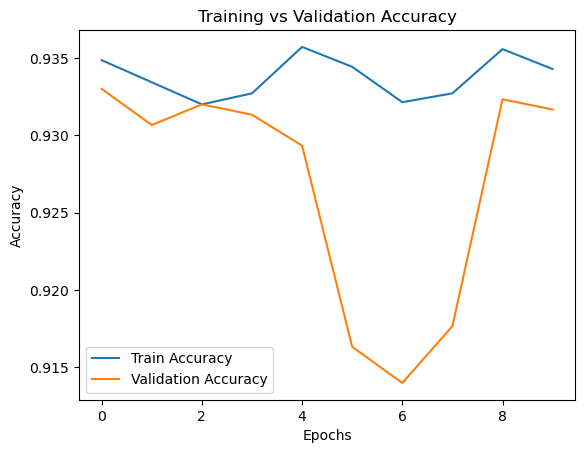

In [31]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

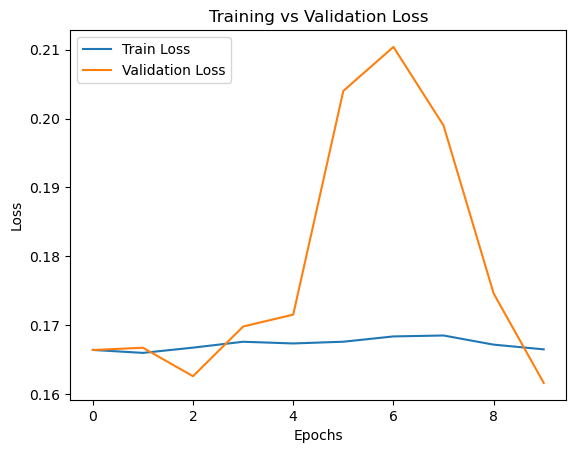

In [32]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


# Membuat dan Melatih Model untuk Klasifikasi Banyak Kelas

In [33]:
df = pd.read_csv("./Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df = df.drop(columns="Id")

In [35]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [39]:
df.duplicated().sum()

3

In [40]:
df = df.drop_duplicates()

In [41]:
category = pd.get_dummies(df["Species"], dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [42]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [43]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [44]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [46]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [47]:
model = Sequential([    
                    Dense(64, activation='relu', input_shape=(4,)),    
                    Dense(64, activation='relu'),    
                    Dense(3, activation='softmax')])

In [48]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
hist = model.fit(X_train, 
                 Y_train, 
                 epochs=100,
                 validation_data=(X_test, Y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 892ms/step - accuracy: 0.3922 - loss: 1.0856 - val_accuracy: 0.4667 - val_loss: 1.0545
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4314 - loss: 1.0526 - val_accuracy: 0.7333 - val_loss: 1.0206
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5686 - loss: 1.0242 - val_accuracy: 0.7778 - val_loss: 0.9923
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5980 - loss: 0.9961 - val_accuracy: 0.7778 - val_loss: 0.9655
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6275 - loss: 0.9696 - val_accuracy: 0.8667 - val_loss: 0.9414
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7353 - loss: 0.9423 - val_accuracy: 0.9111 - val_loss: 0.9165
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8922 - loss: 0.9161 - val_accuracy: 0.8222 - val_loss: 0.8966
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8137 - loss: 0.8895 - val_accuracy: 0.7556 - val_loss

In [50]:
model.evaluate(X_test, Y_test, batch_size=1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9556 - loss: 0.0770       


[0.07702948898077011, 0.9555555582046509]

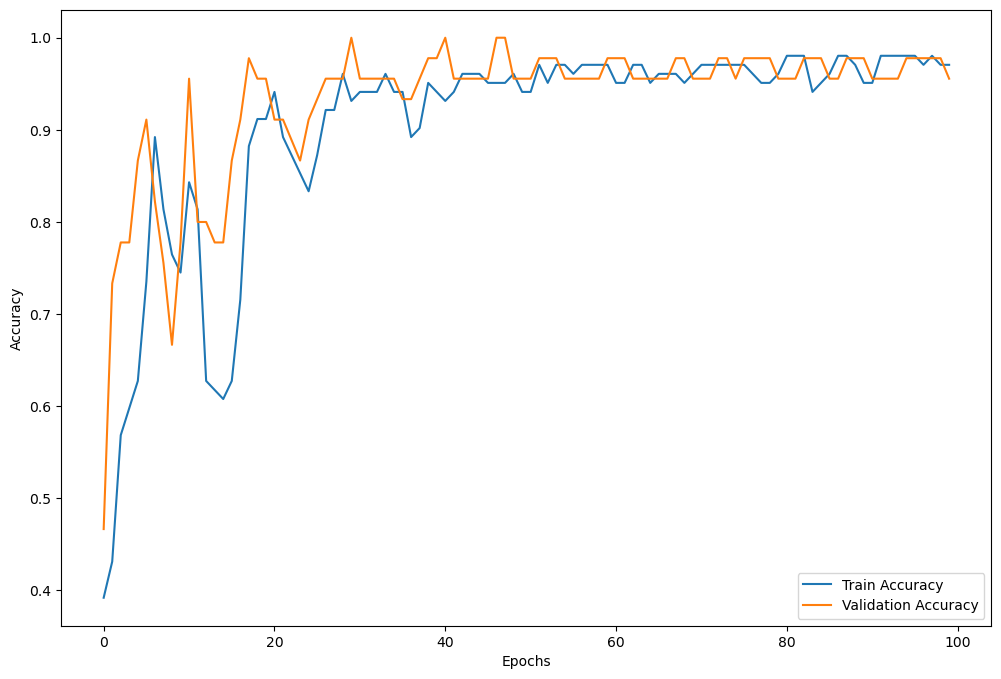

In [51]:
fig = plt.figure(figsize=(12, 8))
plt.plot(hist.history["accuracy"], label="Train Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

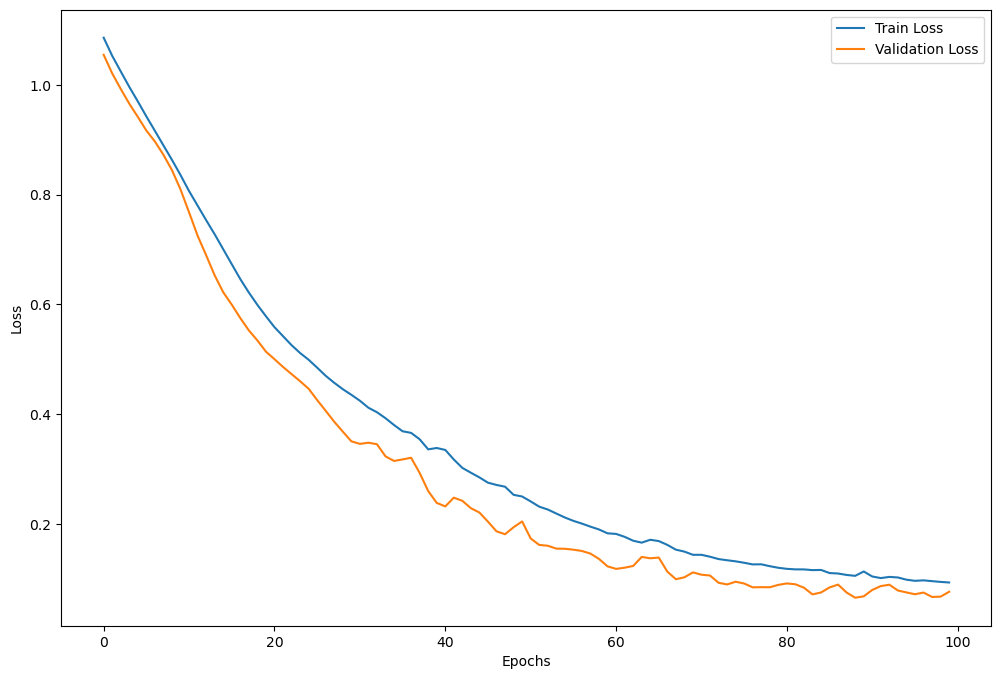

In [52]:
fig = plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot Loss dan Akurasi dari Trained Model

In [53]:
import matplotlib.pyplot as plt

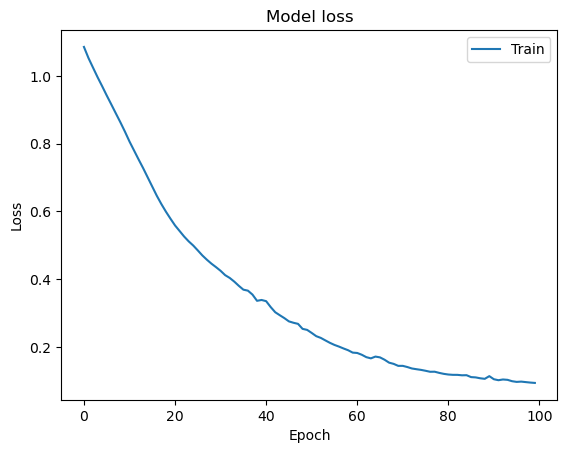

In [54]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

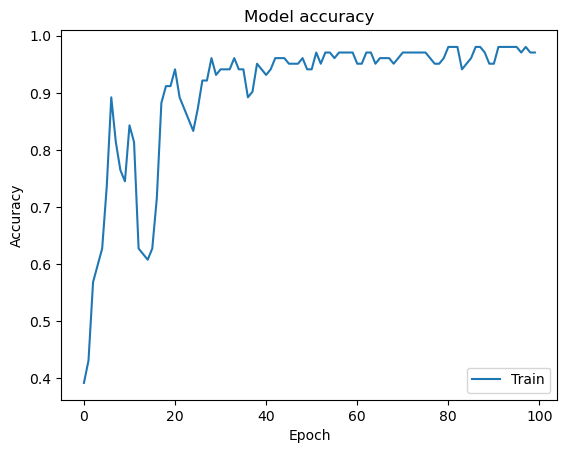

In [55]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

# Mencegah Overfitting dengan Dropout dan Batch Normalization

## Dropout

Salah satu cara mencegah overfitting adalah dengan menggunakan dropout. Dropout adalah fungsi standar yang umum digunakan industri untuk mencegah overfitting. Seperti yang kita ketahui, semakin kompleks sebuah model machine learning, semakin tinggi kemungkinan model tersebut mengalami overfitting. Dropout bekerja dengan cara mengurangi kompleksitas model neural network tanpa mengubah arsitektur model tersebut. 

In [7]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    Dense(3, activation='softmax')])

I0000 00:00:1758688951.858724    3980 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2286 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:02:00.0, compute capability: 8.6


In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices("GPU"))


2025-09-24 13:42:57.541024: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Batch Normalization

BatchNormalization adalah layer yang digunakan dalam jaringan saraf tiruan (neural network) untuk mempercepat konvergensi pelatihan dan mengurangi sensitivitas terhadap inisialisasi parameter. Layer ini bekerja dengan melakukan normalisasi input dari layer sebelumnya pada setiap batch sehingga memungkinkan pelatihan yang lebih stabil dan cepat.

In [8]:
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0.5),
                    BatchNormalization(momentum=0.99),
                    Dense(3, activation='softmax')])

# Optimasi Pelatihan Menggunakan Callbacks

In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
df = pd.read_csv('./Iris.csv')
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species, dtype=int)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
X = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]
# Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
from keras.layers import Dense, Dropout, BatchNormalization
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dropout(0,5),
                    BatchNormalization(momentum=0.99),
                    Dense(3, activation='softmax')])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=100)

/home/ayam/miniconda3/envs/tf220/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758696189.216942    3306 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2060 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:02:00.0, compute capability: 8.6


Epoch 1/100


2025-09-24 13:43:10.878454: I external/local_xla/xla/service/service.cc:163] XLA service 0x7540140062d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-24 13:43:10.878469: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-09-24 13:43:10.915083: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-24 13:43:11.078138: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91300


1/4 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5312 - loss: 0.9786

I0000 00:00:1758696192.676834    3739 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 463ms/step - accuracy: 0.5905 - loss: 0.8611
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8000 - loss: 0.5279 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9143 - loss: 0.3891 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9238 - loss: 0.3280 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9429 - loss: 0.2785 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9714 - loss: 0.2323 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9238 - loss: 0.2664 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9619 - loss: 0.2065 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9429 - loss: 0.1920 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9810 - loss: 0.1672 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9810 - loss: 0.1589 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9524 - loss: 0.1673 
